Enter number of clusters (k): 3
Enter data points (e.g., 1,2,3,4,5,6): 3,4,6,8,0,4,77
Odd number of values detected — ignoring the last incomplete pair.


/tmp/ipython-input-3537410471.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_labels))


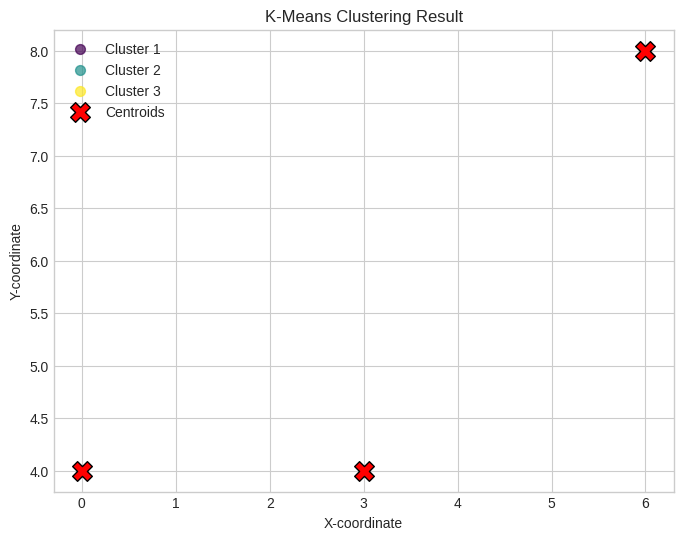

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def kmeans(data, k, max_iterations=100):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    for _ in range(max_iterations):
        distances = np.sqrt(((data - centroids[:, np.newaxis]) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        new_centroids = np.array([data[labels == j].mean(axis=0) for j in range(k)])
        if np.allclose(centroids, new_centroids, atol=1e-4):
            break
        centroids = new_centroids
    return centroids, labels

def plot_clusters(data, centroids, labels):
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    colors = plt.cm.get_cmap('viridis', len(unique_labels))

    for i in unique_labels:
        plt.scatter(
            data[labels == i, 0],
            data[labels == i, 1],
            s=50,
            color=colors(i),
            label=f'Cluster {i + 1}',
            alpha=0.7
        )

    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        s=200,
        color='red',
        marker='X',
        edgecolors='black',
        label='Centroids'
    )

    plt.title('K-Means Clustering Result')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    try:
        k = int(input("Enter number of clusters (k): "))
        if k <= 0:
            print("Number of clusters must be a positive integer.")
        else:
            user_input = input("Enter data points (e.g., 1,2,3,4,5,6): ")
            values_str = [val.strip() for val in user_input.split(',') if val.strip()]

            if len(values_str) % 2 != 0:
                print("Odd number of values detected — ignoring the last incomplete pair.")
                values_str = values_str[:-1]

            if len(values_str) > 0:
                data_list = [float(val) for val in values_str]
                data = np.array(data_list).reshape(-1, 2)

                if data.shape[0] >= k:
                    final_centroids, final_labels = kmeans(data, k)
                    plot_clusters(data, final_centroids, final_labels)
                else:
                    print("Number of points must be greater than or equal to number of clusters.")
            else:
                print("No valid data points entered.")
    except ValueError:
        print("Invalid input. Please make sure to enter a valid integer for k and numeric values for data points.")
    except Exception as e:
        print(f"An error occurred: {e}")


In [ ]:
import numpy as np

def kmeans(data, k, max_iterations=100):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    for _ in range(max_iterations):
        distances = np.sqrt(((data - centroids[:, np.newaxis]) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        new_centroids = np.array([data[labels == j].mean(axis=0) for j in range(k)])
        if np.allclose(centroids, new_centroids, atol=1e-4):
            break
        centroids = new_centroids
    return centroids, labels

if __name__ == "__main__":
    try:
        k = int(input("Enter number of clusters (k): "))
        if k <= 0:
            print("Number of clusters must be a positive integer.")
        else:
            user_input = input("Enter data points (e.g., 1,2,3,4,5,6): ")
            values_str = [val.strip() for val in user_input.split(',') if val.strip()]

            if len(values_str) % 2 != 0:
                print("Odd number of values detected — ignoring the last incomplete pair.")
                values_str = values_str[:-1]

            if len(values_str) > 0:
                data_list = [float(val) for val in values_str]
                data = np.array(data_list).reshape(-1, 2)

                if data.shape[0] >= k:
                    final_centroids, final_labels = kmeans(data, k)

                    print("\nK-Means Clustering Result:")
                    for i, point in enumerate(data):
                        print(f"Point {i+1} {tuple(point)} → Cluster {final_labels[i] + 1}")

                    print("\nFinal Centroids:")
                    for i, centroid in enumerate(final_centroids):
                        print(f"Cluster {i+1} Centroid: {tuple(np.round(centroid, 3))}")
                else:
                    print("Number of points must be greater than or equal to number of clusters.")
            else:
                print("No valid data points entered.")
    except ValueError:
        print("Invalid input. Please make sure to enter a valid integer for k and numeric values for data points.")
    except Exception as e:
        print(f"An error occurred: {e}")
